# Set Up

In [1]:
import pandas
import pandas as pd
from datetime import datetime
# read in CSV
RAW_DF = pd.read_csv('surveyresponses2021.csv')

In [2]:
# DATA CLEANING

# drop metadata columns
CLEAN_DF = RAW_DF.drop(columns=['StartDate', 'EndDate', 'Status', 'Progress', 'Duration (in seconds)', 'Finished', 'RecordedDate', 'ResponseId', 'DistributionChannel', 'UserLanguage'])
# create question key
QUESTION_KEY = CLEAN_DF.drop(range(1, CLEAN_DF.shape[0])).to_dict()
# drop metadata rows
CLEAN_DF = CLEAN_DF.drop([0, 1])

# standardize expected graduation date with datetime
DATETIME_COL = pd.to_datetime(CLEAN_DF['Q2'], errors='coerce')
DATETIME_COL[DATETIME_COL.isna()] = pd.to_datetime(CLEAN_DF['Q2'][DATETIME_COL.isna()], errors='coerce', format='%M/%y')
# add column with expected graduation date as datetime
CLEAN_DF['Q2_DT'] = DATETIME_COL
# drop responses for respondents outside of graduation date range
CLEAN_DF = CLEAN_DF[(datetime(2020, 9, 1) <= CLEAN_DF['Q2_DT']) & (CLEAN_DF['Q2_DT'] <= datetime(2025, 8, 31))]

In [3]:
# CONSTANTS

# schools
ARTS_HUMANITIES = ['Art, Film, and Visual Studies', 'Classics', 'Comparative Literature', 'East Asian Studies', 'English', 'Folklore and Mythology', 'Germanic Languages and Literatures', 'History and Literature', 'History of Art and Architecture', 'Linguistics', 'Music', 'Near Eastern Languages and Civilizations', 'Philosophy', 'Religion, Comparative Study of', 'Romance Languages and Literatures', 'Slavic Languages and Literatures', 'South Asian Studies', 'Theater, Dance, & Media']
SOCIAL_SCIENCES = ['African and African American Studies', 'Anthropology', 'Economics', 'Environmental Science and Public Policy', 'Government', 'History', 'History and Science', 'Psychology', 'Social Studies', 'Sociology', 'Women, Gender, and Sexuality, Study of']
PURE_SCIENCES = ['Astrophysics', 'Chemical and Physical Biology', 'Chemistry', 'Chemistry and Physics', 'Earth and Planetary Sciences', 'Human Developmental and Regenerative Biology', 'Human Evolutionary Biology', 'Integrative Biology', 'Mathematics', 'Molecular and Cellular Biology', 'Neuroscience', 'Physics', 'Statistics']
SEAS = ['Applied Mathematics', 'Biomedical Engineering', 'Computer Science', 'Electrical Engineering', 'Engineering Sciences', 'Environmental Science and Engineering', 'Mechanical Engineering']
UNDECIDED = ['Undecided']
NONE = ['None']

# class year
FIRSTYEAR = (datetime(2024, 9, 1) <= CLEAN_DF['Q2_DT']) & (CLEAN_DF['Q2_DT'] <= datetime(2025, 8, 31))
SOPHOMORE = (datetime(2023, 9, 1) <= CLEAN_DF['Q2_DT']) & (CLEAN_DF['Q2_DT'] <= datetime(2024, 8, 31))
JUNIOR = (datetime(2022, 9, 1) <= CLEAN_DF['Q2_DT']) & (CLEAN_DF['Q2_DT'] <= datetime(2023, 8, 31))
SENIOR = (datetime(2021, 9, 1) <= CLEAN_DF['Q2_DT']) & (CLEAN_DF['Q2_DT'] <= datetime(2022, 8, 31))

# gender identity
MALE = ['Man']
NONMALE = ['Woman', 'Non-binary']

# sexual orientation
STRAIGHT = ['Straight/Heterosexual']
NONSTRAIGHT = ['Queer', 'Questioning or unsure']

# diagnosed with disability/impairment
DIAGNOSED = ['Yes, I have been diagnosed with a disability or impairment']
NONDIAGNOSED = ['No, I have not been diagnosed with a disability or impairment']


In [4]:
# LIKERT SCALES

LIKERT_KNOWLEDGE_KEY = {
    'Significantly less knowledgeable' : 1,
    'Less knowledgeable' : 2,
    'Slightly less knowledgeable' : 3,
    'Similarly knowledgeable' : 4,
    'Slightly more knowledgeable' : 5,
    'More knowledgeable' : 6,
    'Significantly more knowledgeable' : 7
}

LIKERT_AGREEMENT_KEY = {
    'Strongly disagree' : 1,
    'Disagree' : 2,
    'Somewhat disagree' : 3,
    'Neither agree nor disagree' : 4,
    'Somewhat agree' : 5,
    'Agree' : 6,
    'Strongly agree' : 7
}

# Demo

### Question key

In [5]:
# Question key, maps question ID to question text
print(QUESTION_KEY['Q1'][0])
CLEAN_DF.head()

What is your intended concentration?

If you are a joint concentrator, select your primary concentration. If you are undeclared, you may still select an intended concentration.


,Q1,Q2,Q3,Q4,Q5,Q6,Q6_5_TEXT,Q7_1,Q7_2,Q7_3,...,Q31,Q32,Q33,Q33_8_TEXT,Q34,Q35,Q36,Q37,Q37_4_TEXT,Q2_DT
2,Computer Science,06/2025,Yes,Computer Science,My first-year academic advisor,In high school (including summer after graduat...,NaN,4,3,2,...,No,Straight/Heterosexual,White,NaN,"No, not of Hispanic or Latinx origin",No,Yes,"No, I have not been diagnosed with a disabilit...",NaN,2025-06-01
3,Computer Science,05/2025,Yes,Computer Science,NaN,In high school (including summer after graduat...,NaN,5,3,4,...,No,Straight/Heterosexual,Asian,NaN,"No, not of Hispanic or Latinx origin",No,No,"No, I have not been diagnosed with a disabilit...",NaN,2025-05-01
4,Undecided,05/2024,No,"Art, Film, and Visual Studies,Comparative Lite...","Department heads,Department faculty,Department...",I have never been taught programming or comput...,NaN,NaN,NaN,NaN,...,Prefer not to say,Queer,Asian,NaN,"No, not of Hispanic or Latinx origin",No,No,"No, I have not been diagnosed with a disabilit...",NaN,2024-05-01
5,Physics,05/2024,Yes,Physics,"Residential advising resources, such as house ...",In college,NaN,NaN,NaN,NaN,...,No,Questioning or unsure,"Asian,Native Hawaiian or Other Pacific Islander",NaN,"No, not of Hispanic or Latinx origin",No,No,"No, I have not been diagnosed with a disabilit...",NaN,2024-05-01
6,Applied Mathematics,05/2024,Yes,"Applied Mathematics,Economics",NaN,In high school (including summer after graduat...,NaN,NaN,NaN,NaN,...,No,Questioning or unsure,Asian,NaN,"No, not of Hispanic or Latinx origin",No,No,"No, I have not been diagnosed with a disabilit...",NaN,2024-05-01


### Filter by concentration/secondary

In [6]:
# All primary SEAS concentrators
CLEAN_DF[CLEAN_DF['Q1'].isin(SEAS)].shape

(62, 77)

In [7]:
# All decided concentrators
CLEAN_DF[~(CLEAN_DF['Q1'].isin(UNDECIDED))].shape

(91, 77)

In [8]:
# All CS concentrators
CLEAN_DF[(CLEAN_DF['Q1'] == 'Computer Science')].shape

(53, 77)

### Class year

In [9]:
# All firstyears
CLEAN_DF[FIRSTYEAR].shape

(21, 77)

In [10]:
# All sophomores
CLEAN_DF[SOPHOMORE].shape

(27, 77)

In [11]:
# All juniors
CLEAN_DF[JUNIOR].shape

(28, 77)

In [12]:
# All seniors
CLEAN_DF[SENIOR].shape

(17, 77)

### Has enrolled in CS course

In [13]:
# All undergraduates who have enrolled in a CS course
CLEAN_DF[CLEAN_DF['Q3'] == 'Yes'].shape

(78, 77)

### Gender identity

In [14]:
# All male respondents
CLEAN_DF[CLEAN_DF['Q30'].isin(MALE)].shape

(18, 77)

In [15]:
# All female, non-binary/third gender, agender, and genderqueer respondents
CLEAN_DF[CLEAN_DF['Q30'].isin(NONMALE)].shape

(72, 77)

### BGLTQ+

In [16]:
# All BGLTQ+ respondents
CLEAN_DF[CLEAN_DF['Q32'].isin(NONSTRAIGHT)].shape

(31, 77)

In [17]:
# All non BGLTQ+ respondents
CLEAN_DF[CLEAN_DF['Q32'].isin(STRAIGHT)].shape

(59, 77)

### Race and ethnicity

In [18]:
# All White respondents
CLEAN_DF[CLEAN_DF['Q33'].str.contains('White', na=False)].shape

(29, 77)

In [19]:
# All Asian respondents
CLEAN_DF[CLEAN_DF['Q33'].str.contains('Asian', na=False)].shape

(65, 77)

In [20]:
# All Black respondents
CLEAN_DF[CLEAN_DF['Q33'].str.contains('Black or African American', na=False)].shape

(4, 77)

In [21]:
# All Hispanic / Latinx respondents
CLEAN_DF[CLEAN_DF['Q34'] == 'Yes, of Hispanic or Latinx origin'].shape

(3, 77)

### FGLI (first generation, low income)

In [22]:
# All first generation respondents
CLEAN_DF[CLEAN_DF['Q35'] == 'Yes'].shape

(9, 77)

In [23]:
# All low income respondents
CLEAN_DF[CLEAN_DF['Q36'] == 'Yes'].shape

(14, 77)

### Diagnosed with disability/impairment

In [24]:
# All respondents diagnosed with a disability or impairment
CLEAN_DF[CLEAN_DF['Q37'].isin(DIAGNOSED)].shape

(7, 77)

In [25]:
# All respondents not diagnosed with a disability or impairment
CLEAN_DF[CLEAN_DF['Q37'].isin(NONDIAGNOSED)].shape

(76, 77)

# Your Turn!

For each question, consider how the responses vary based on each of the following factors:
* School (SEAS, Arts/Humanties, Social Sciences, Pure Sciences) where applicable
* Class year
* Gender identity
* BGLTQ+
* Race and ethnicity
* FGLI (first generation, low income)
* Disability

Be sure to consider combinations of factors as well (ex: Gender Identity + Race/Ethnicity). Ensure that n > 5 for all population groups.

### Section 3 (Q12, Q13, Q14, Q15, Q21)

In [26]:
print(QUESTION_KEY['Q12'][0])

Q12_OPTIONS = [
    'CS 1: Great Ideas in Computer Science',
    'CS 1: Great Ideas in Computer Science',
    'CS 10: Elements of Data Science',
    'CS 20: Discrete Mathematics for Computer Science',
    'CS 50: Introduction to Computer Science I',
    'CS 51: Introduction to Computer Science II',
    'CS 61: Systems Programming and Machine Organization',
    'CS 121: Introduction to Theoretical Computer Science',
    'CS 124: Data Structures and Algorithms',
    'CS 9x, an undergraduate-level research CS course',
    'CS 12x, an undergraduate-level theoretical CS course (other than CS 121 or CS 124)',
    'CS 13x, an undergraduate-level economics/computation course',
    'CS 14x, an undergraduate-level networks course',
    'CS 15x, an undergraduate-level programming languages course',
    'CS 16x, an undergraduate-level systems course',
    'CS 17x, an undergraduate-level graphics/visualization/user interfaces course',
    'CS 18x, an undergraduate-level artificial intelligence course',
    'CS 10x, an undergraduate-level miscellaneous course',
    'CS 22x, a graduate-level theoretical computer science course',
    'CS 23x, a graduate-level economics/computation course',
    'CS 24x, a graduate-level networks course',
    'CS 25x, a graduate-level programming languages course',
    'CS 26x, a graduate-level systems course',
    'CS 27x, a graduate-level graphics/visualization/user interfaces course',
    'CS 28x, a graduate-level artificial intelligence course',
    'CS 20x, a graduate-level miscellaneous course'
]

Indicate which of the following Harvard CS courses you have taken, including in this semester:


Please indicate the extent to which you disagree or agree with the following statement:
I can easily find problem set partners within a CS course.



/Users/lkwee/Library/Python/3.9/lib/python/site-packages/pandas/plotting/_matplotlib/tools.py:218: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(**fig_kw)


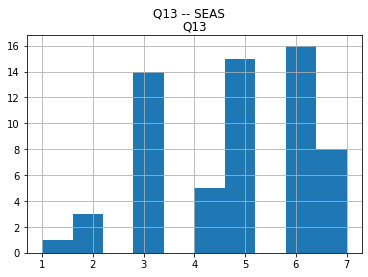

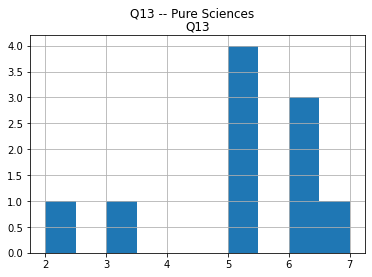

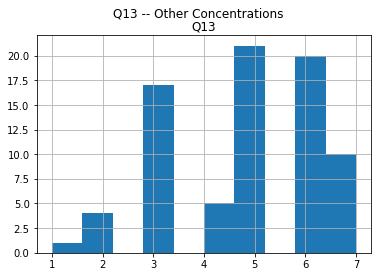

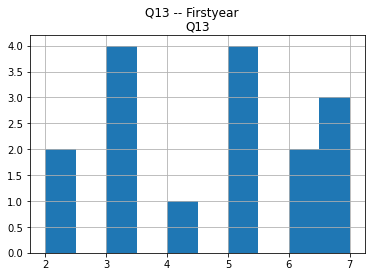

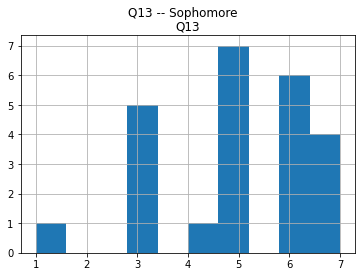

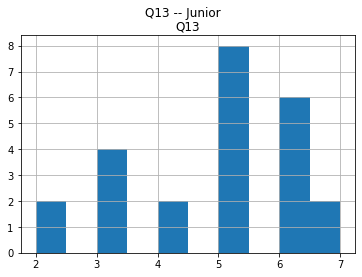

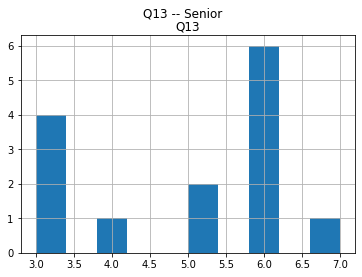

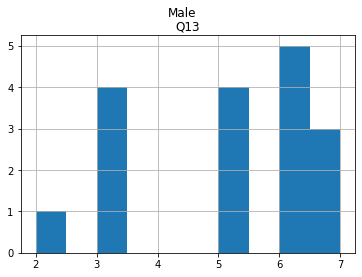

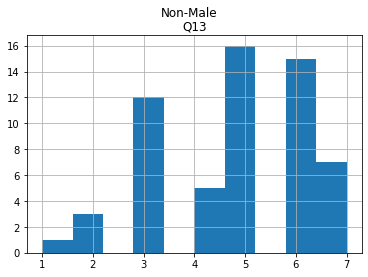

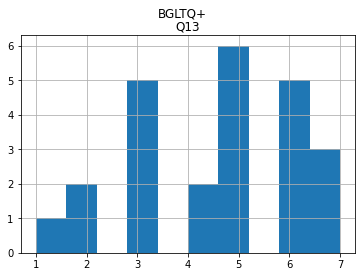

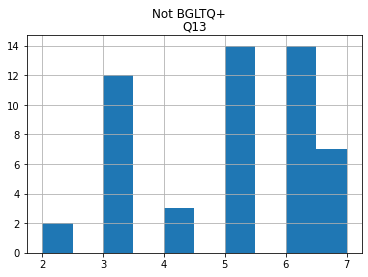

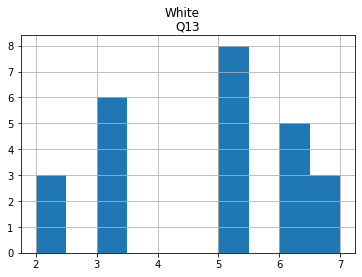

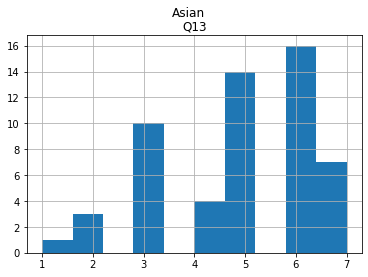

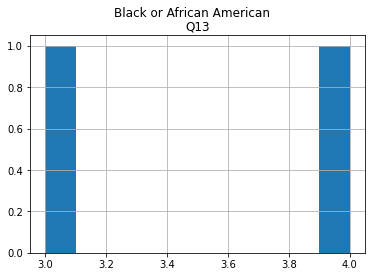

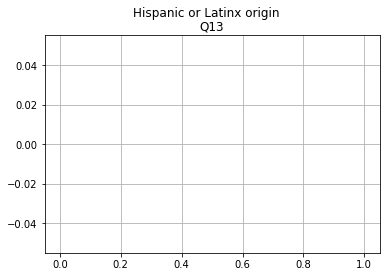

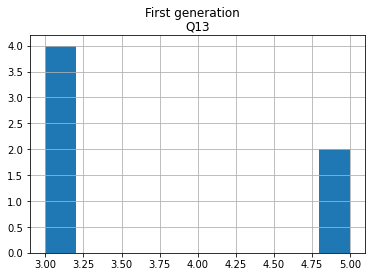

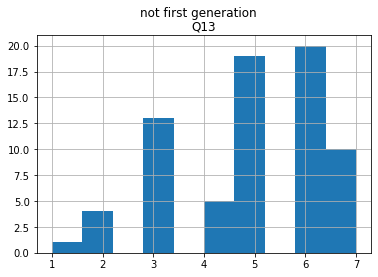

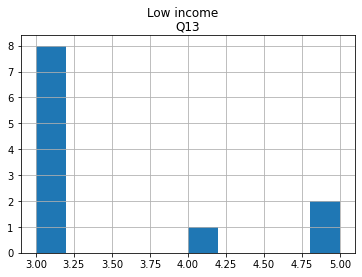

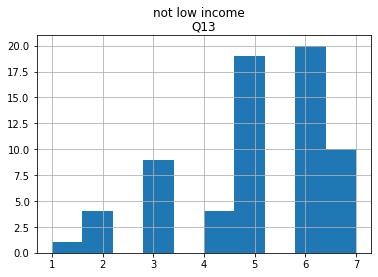

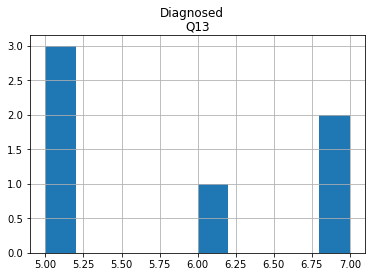

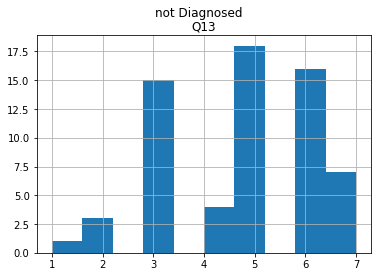

In [29]:
import pylab as pl
non_num_questions = ['Q12','Q14','Q15']
# num_questions = ['Q13','Q21_1','Q21_2','Q21_3']
num_questions = ['Q13']

#fix analysis for q21, doesn't recognize numerical data

# add column with likert scale as number
CLEAN_DF['Q13'] = CLEAN_DF['Q13'].map(LIKERT_AGREEMENT_KEY)

for quest in num_questions:
    print(QUESTION_KEY[quest][0] + '\n')
    CLEAN_DF[quest].dropna
    
    #by concentration range
    histogram = CLEAN_DF[CLEAN_DF['Q1'].isin(SEAS)].hist(column=[quest])
    pl.suptitle(quest + ' -- SEAS')
    histogram = CLEAN_DF[CLEAN_DF['Q1'].isin(PURE_SCIENCES)].hist(column=[quest])
    pl.suptitle(quest + ' -- Pure Sciences')
    histogram = CLEAN_DF[CLEAN_DF['Q1'].isin(ARTS_HUMANITIES + SOCIAL_SCIENCES + PURE_SCIENCES + SEAS + UNDECIDED + NONE)].hist(column=[quest])
    pl.suptitle(quest + ' -- Other Concentrations')

    # by class year
    histogram = CLEAN_DF[FIRSTYEAR].hist(column=[quest])
    pl.suptitle(quest + ' -- Firstyear')
    histogram = CLEAN_DF[SOPHOMORE].hist(column=[quest])
    pl.suptitle(quest + ' -- Sophomore')
    histogram = CLEAN_DF[JUNIOR].hist(column=[quest])
    pl.suptitle(quest + ' -- Junior')
    histogram = CLEAN_DF[SENIOR].hist(column=[quest])
    pl.suptitle(quest + ' -- Senior')

    # by gender
    histogram = CLEAN_DF[CLEAN_DF['Q30'].isin(MALE)].hist(column=[quest])
    pl.suptitle('Male')
    histogram = CLEAN_DF[CLEAN_DF['Q30'].isin(NONMALE)].hist(column=[quest])
    pl.suptitle('Non-Male')

    # by BGLTQ
    histogram = CLEAN_DF[CLEAN_DF['Q32'].isin(NONSTRAIGHT)].hist(column=[quest])
    pl.suptitle('BGLTQ+')
    histogram = CLEAN_DF[CLEAN_DF['Q32'].isin(STRAIGHT)].hist(column=[quest])
    pl.suptitle('Not BGLTQ+')

    # by race
    # All White respondents
    histogram = CLEAN_DF[CLEAN_DF['Q33'].str.contains('White', na=False)].hist(column=[quest])
    pl.suptitle('White')


    # All Asian respondents
    histogram = CLEAN_DF[CLEAN_DF['Q33'].str.contains('Asian', na=False)].hist(column=[quest])
    pl.suptitle('Asian')
    
    # All Black respondents
    histogram = CLEAN_DF[CLEAN_DF['Q33'].str.contains('Black or African American', na=False)].hist(column=[quest])
    pl.suptitle('Black or African American')

    # All Hispanic / Latinx respondents
    histogram = CLEAN_DF[CLEAN_DF['Q33'].str.contains('Yes, of Hispanic or Latinx origin', na=False)].hist(column=[quest])
    pl.suptitle('Hispanic or Latinx origin')

    # by FGLI
    histogram = CLEAN_DF[CLEAN_DF['Q35'] == 'Yes'].hist(column=[quest])
    pl.suptitle('First generation')
    histogram = CLEAN_DF[CLEAN_DF['Q35'] != 'Yes'].hist(column=[quest])
    pl.suptitle('not first generation')

    histogram = CLEAN_DF[CLEAN_DF['Q36'] == 'Yes'].hist(column=[quest])
    pl.suptitle('Low income')
    histogram = CLEAN_DF[CLEAN_DF['Q36'] != 'Yes'].hist(column=[quest])
    pl.suptitle('not low income')

    # by Disability
    histogram = CLEAN_DF[CLEAN_DF['Q37'].isin(DIAGNOSED)].hist(column=[quest])
    pl.suptitle('Diagnosed')
    histogram = CLEAN_DF[CLEAN_DF['Q37'].isin(NONDIAGNOSED)].hist(column=[quest])
    pl.suptitle('not Diagnosed')

In [28]:
import pylab as pl
non_num_questions = ['Q12','Q14','Q15']
# num_questions = ['Q13','Q21_1','Q21_2','Q21_3']
num_questions = ['Q21_1']

#fix analysis for q21, doesn't recognize numerical data - for 21, ints are currently seen as objects (aka string)


for quest in num_questions:
    print(QUESTION_KEY[quest][0] + '\n')
    CLEAN_DF[quest] = CLEAN_DF[quest].astype(int, errors='ignore')
    CLEAN_DF[quest].dropna
    display(CLEAN_DF[quest])
    CLEAN_DF[quest].dtypes
    
    #fix above lines^^
    
    #by concentration range
    histogram = CLEAN_DF[CLEAN_DF['Q1'].isin(SEAS)].hist(column=[quest])
    pl.suptitle(quest + ' -- SEAS')
    histogram = CLEAN_DF[CLEAN_DF['Q1'].isin(PURE_SCIENCES)].hist(column=[quest])
    pl.suptitle(quest + ' -- Pure Sciences')
    histogram = CLEAN_DF[CLEAN_DF['Q1'].isin(ARTS_HUMANITIES + SOCIAL_SCIENCES + PURE_SCIENCES + SEAS + UNDECIDED + NONE)].hist(column=[quest])
    pl.suptitle(quest + ' -- Other Concentrations')

    # by class year
    histogram = CLEAN_DF[FIRSTYEAR].hist(column=[quest])
    pl.suptitle(quest + ' -- Firstyear')
    histogram = CLEAN_DF[SOPHOMORE].hist(column=[quest])
    pl.suptitle(quest + ' -- Sophomore')
    histogram = CLEAN_DF[JUNIOR].hist(column=[quest])
    pl.suptitle(quest + ' -- Junior')
    histogram = CLEAN_DF[SENIOR].hist(column=[quest])
    pl.suptitle(quest + ' -- Senior')

    # by gender
    histogram = CLEAN_DF[CLEAN_DF['Q30'].isin(MALE)].hist(column=[quest])
    pl.suptitle('Male')
    histogram = CLEAN_DF[CLEAN_DF['Q30'].isin(NONMALE)].hist(column=[quest])
    pl.suptitle('Non-Male')

    # by BGLTQ
    histogram = CLEAN_DF[CLEAN_DF['Q32'].isin(NONSTRAIGHT)].hist(column=[quest])
    pl.suptitle('BGLTQ+')
    histogram = CLEAN_DF[CLEAN_DF['Q32'].isin(STRAIGHT)].hist(column=[quest])
    pl.suptitle('Not BGLTQ+')

    # by race
    # All White respondents
    histogram = CLEAN_DF[CLEAN_DF['Q33'].str.contains('White', na=False)].hist(column=[quest])
    pl.suptitle('White')


    # All Asian respondents
    histogram = CLEAN_DF[CLEAN_DF['Q33'].str.contains('Asian', na=False)].hist(column=[quest])
    pl.suptitle('Asian')
    
    # All Black respondents
    histogram = CLEAN_DF[CLEAN_DF['Q33'].str.contains('Black or African American', na=False)].hist(column=[quest])
    pl.suptitle('Black or African American')

    # All Hispanic / Latinx respondents
    histogram = CLEAN_DF[CLEAN_DF['Q33'].str.contains('Yes, of Hispanic or Latinx origin', na=False)].hist(column=[quest])
    pl.suptitle('Hispanic or Latinx origin')

    # by FGLI
    histogram = CLEAN_DF[CLEAN_DF['Q35'] == 'Yes'].hist(column=[quest])
    pl.suptitle('First generation')
    histogram = CLEAN_DF[CLEAN_DF['Q35'] != 'Yes'].hist(column=[quest])
    pl.suptitle('not first generation')

    histogram = CLEAN_DF[CLEAN_DF['Q36'] == 'Yes'].hist(column=[quest])
    pl.suptitle('Low income')
    histogram = CLEAN_DF[CLEAN_DF['Q36'] != 'Yes'].hist(column=[quest])
    pl.suptitle('not low income')

    # by Disability
    histogram = CLEAN_DF[CLEAN_DF['Q37'].isin(DIAGNOSED)].hist(column=[quest])
    pl.suptitle('Diagnosed')
    histogram = CLEAN_DF[CLEAN_DF['Q37'].isin(NONDIAGNOSED)].hist(column=[quest])
    pl.suptitle('not Diagnosed')

Please indicate the extent to which you disagree or agree with each of the following statements: The student community within my primary concentration is (1 - strongly disagree, 4 - neither agree nor disagree, 7 - strongly agree) - Academically supportive



2       5
3       6
4     NaN
5       6
6       4
     ... 
91      6
92      4
93      4
94      7
95      5
Name: Q21_1, Length: 93, dtype: object

ValueError: hist method requires numerical or datetime columns, nothing to plot.

In [30]:
questions = ['Q12','Q13','Q14','Q15','Q21_1','Q21_2','Q21_3']
for q in questions:
    print(QUESTION_KEY[q][0] + '\n')

Indicate which of the following Harvard CS courses you have taken, including in this semester:

Please indicate the extent to which you disagree or agree with the following statement:
I can easily find problem set partners within a CS course.

Do you plan to enroll in another course within the CS department in a future semester?

If you answered ‘No’ or ‘Undecided’ to the previous question, which of the following reasons may inform your decision to enroll in another course within the CS department?  Select all that apply. - Selected Choice

Please indicate the extent to which you disagree or agree with each of the following statements: The student community within my primary concentration is (1 - strongly disagree, 4 - neither agree nor disagree, 7 - strongly agree) - Academically supportive

Please indicate the extent to which you disagree or agree with each of the following statements: The student community within my primary concentration is (1 - strongly disagree, 4 - neither agree 